# Data Analytics - Preprocessing

# Pair 4 - ASHOKLEY and TATAMTRDVR

---

# 1. Importing required modules

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

---

# 2. Get the dataset from pairs data

In [2]:
pair_df = pd.read_csv("../../Storage/pairs_data/ASHOKLEY-TATAMTRDVR-1.csv")
pair_df.head()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445
2,2019-05-21,88.250000,83.150002,5.099998,-0.329109
3,2019-05-22,87.849998,85.400002,2.449997,-1.330453
4,2019-05-23,88.849998,84.849998,4.000000,-0.744760


In [3]:
pair_df.describe()

,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore
count,62.000000,62.000000,62.000000,6.200000e+01
mean,82.147581,76.176612,5.970968,4.387172e-17
std,9.527215,8.913485,2.668050,1.008163e+00
min,61.150002,55.650002,-1.299995,-2.747445e+00
25%,76.087500,73.249998,4.624998,-5.085954e-01
50%,85.699997,77.949997,5.674999,-1.118364e-01
75%,88.699999,82.812502,7.750000,6.722343e-01
max,93.800003,88.849998,11.700005,2.164804e+00


---

# 3. Calculation of correlation and co-integration

## 3.1. Calculation of correlation between the 2 stocks' closing prices

In [4]:
corr_df = pair_df[["ASHOKLEY_Close", "TATAMTRDVR_Close"]]
corr_df.head()

,ASHOKLEY_Close,TATAMTRDVR_Close
0,84.500000,83.199997
1,87.550003,88.849998
2,88.250000,83.150002
3,87.849998,85.400002
4,88.849998,84.849998


In [5]:
corr = corr_df.corr()
corr.style.background_gradient()

,ASHOKLEY_Close,TATAMTRDVR_Close
ASHOKLEY_Close,1.000000,0.960305
TATAMTRDVR_Close,0.960305,1.000000


- We can see that the closing prices of the 2 stocks are highly correlated

## 3.2. Calculation of p-value to see if the stocks are co-integrated

In [6]:
score, pvalue, _ = coint(pair_df["ASHOKLEY_Close"], pair_df["TATAMTRDVR_Close"])
pvalue

0.0317658452151554

- We also find that with a p-value < 0.05, the correlation is statistically significant

## 3.3. Visualization of the pair

Text(0, 0.5, 'Price')

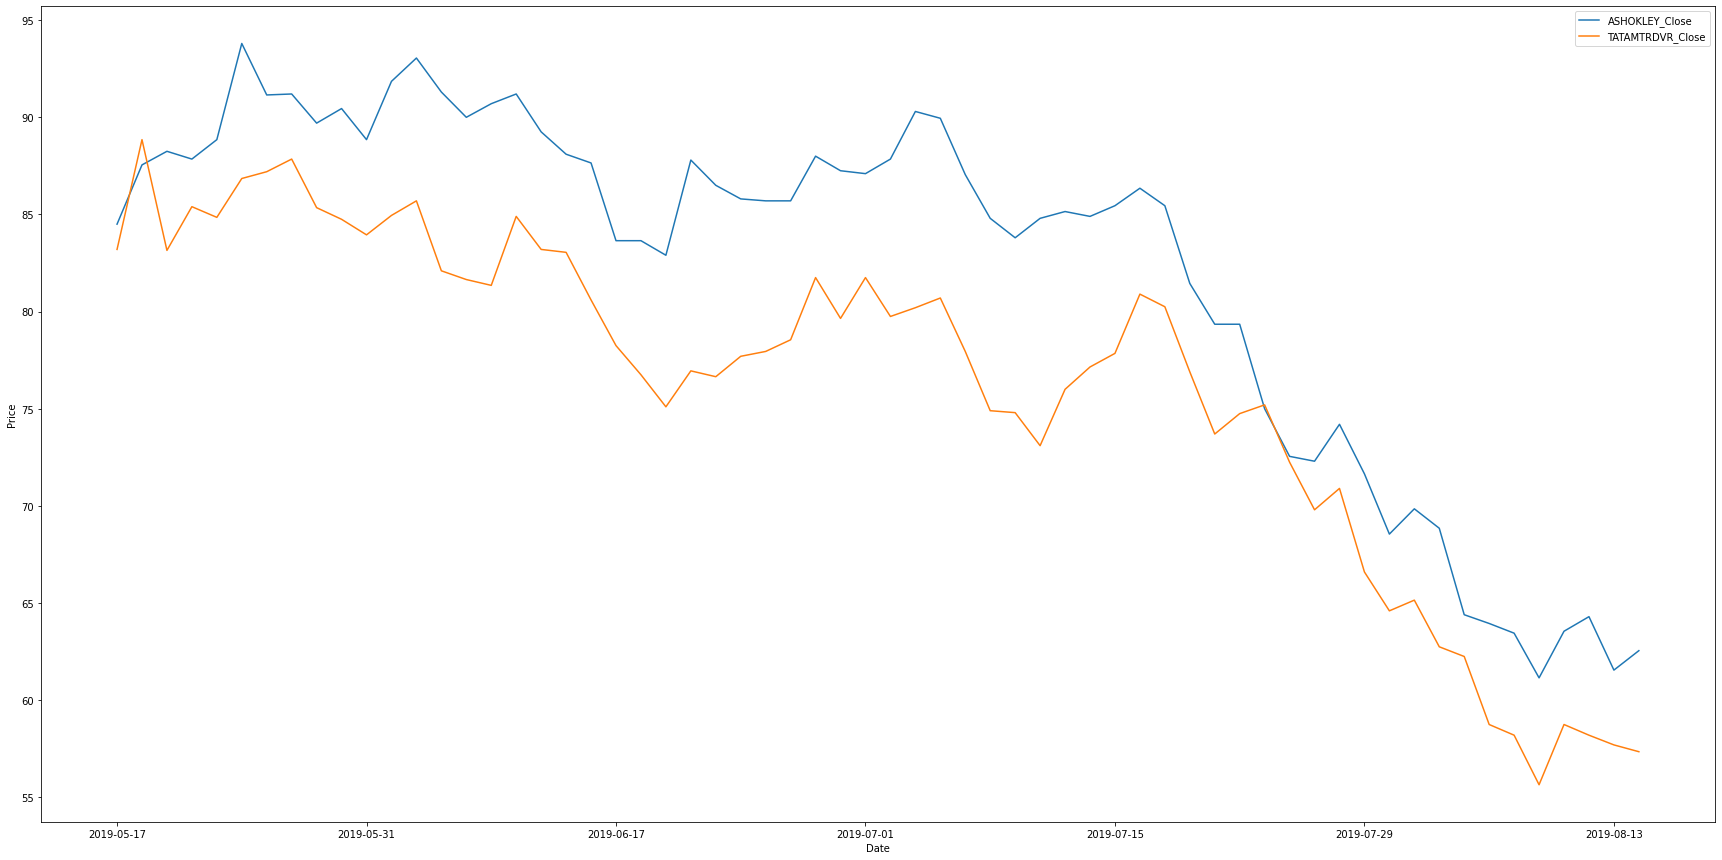

In [7]:
pair_price_plt = pair_df.plot(x='Date', y=['ASHOKLEY_Close', 'TATAMTRDVR_Close'], figsize=(30,15))
pair_price_plt.set_xlabel("Date")
pair_price_plt.set_ylabel("Price")

- We can see that even visually, the stocks are moving in tandem
- This further confirms the validity of the stock pair

---

# 4. Understanding the Spread between the stock pair

## 4.1. Visualizing the spread between the stock pair

Text(0, 0.5, 'Price')

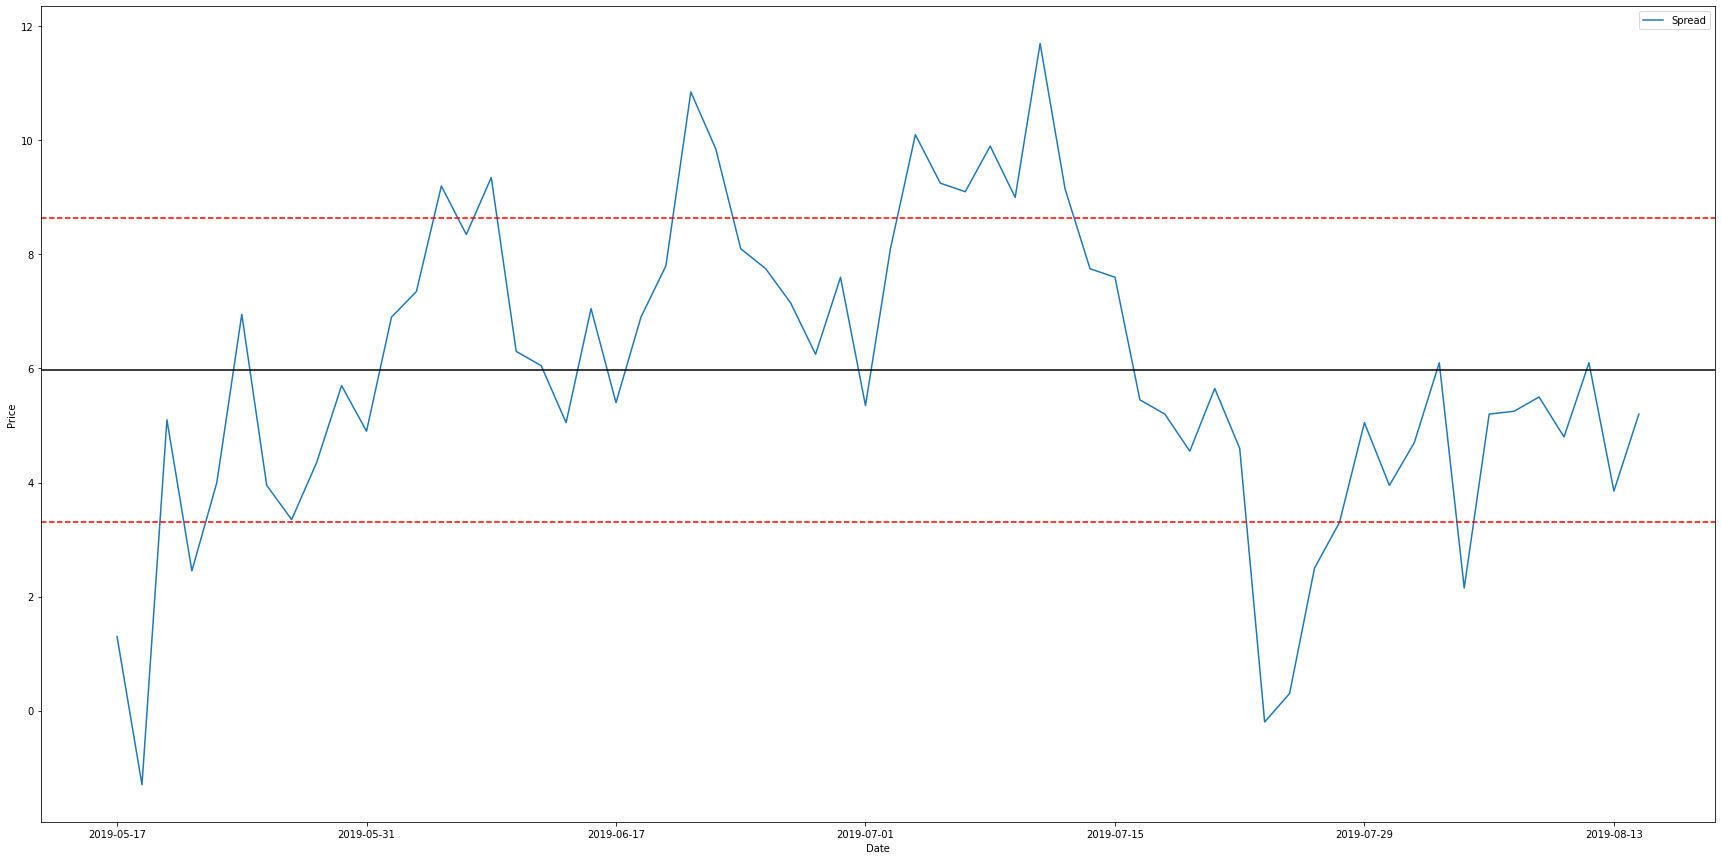

In [8]:
pair_spread_mean = pair_df['Spread'].mean()
spread_std = pair_df['Spread'].std()

pair_spread_plt = pair_df.plot(x='Date', y=['Spread'], figsize=(30,15))

pair_spread_plt.axhline(pair_spread_mean, c='black')
pair_spread_plt.axhline(pair_spread_mean + spread_std, c='red', ls = "--")
pair_spread_plt.axhline(pair_spread_mean - spread_std, c='red', ls = "--")

pair_spread_plt.set_ylabel("Price")

__In the graph above:__
- The blue line is the spread
- The Black line is mean price
- The Red dotted lines represent 1 and 2 standard deviations above and below the mean respectively


## 4.2. Visualizing the zscore of spread between the stock pairs

Text(17.200000000000017, 0.5, 'zscore')

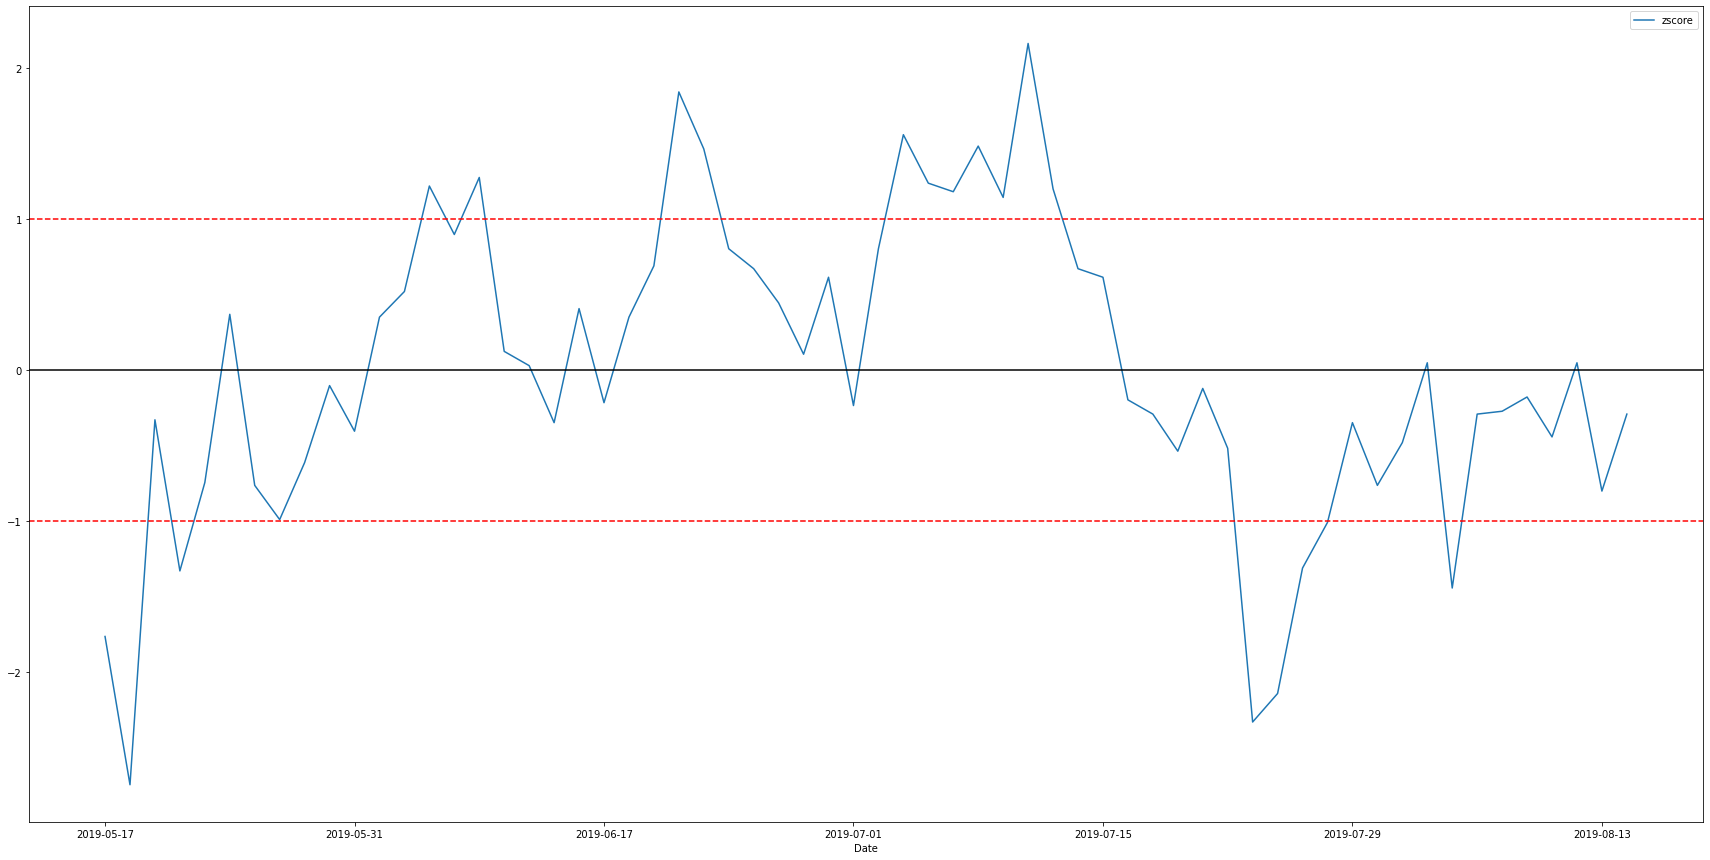

In [9]:
pair_zscore_plt = pair_df.plot(x='Date', y='zscore', figsize=(30,15))

pair_zscore_plt.axhline(0, c='black')
pair_zscore_plt.axhline(1, c='red', ls = "--")
pair_zscore_plt.axhline(-1, c='red', ls = "--")

pair_spread_plt.set_ylabel("zscore")

__In the graph above:__
- The blue line is the zscore of the spread
- The Black line is at 0
- The Red dotted lines represent 1 and -1 respectively

---


# 5. Generating orders on the pair

## 5.1. Function definition and parameters for orders generation

In [10]:
# long positions
# short positions
# flat positions
# Get out of a position

def generate_orders(prices):
    
    orders = []
    
    position = "FLAT"
    
    # Keep track of last price
    # prev_price = None
    
    for price in prices:
        
        # Get out of a LONG position
        if position == "LONG" and (price == 0 or price > 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"
            
        # Get out of a SHORT position
        elif position == "SHORT" and (price == 0 or price < 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"

        # Get into a long position
        elif price < -1.5:
            position = "LONG"
            orders.append("LONG")

        # Get into a long position
        elif price > 1.5:
            position = "SHORT"
            orders.append("SHORT")

        # Default if no other order is placed
        else:
            orders.append("FLAT")

    return orders


## 5.2. Making a copy of the dataframe to add orders

In [11]:
pair_orders_df = pair_df.copy()
pair_orders_df.head()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445
2,2019-05-21,88.250000,83.150002,5.099998,-0.329109
3,2019-05-22,87.849998,85.400002,2.449997,-1.330453
4,2019-05-23,88.849998,84.849998,4.000000,-0.744760


## 5.3. Generating orders on the pair

In [12]:
pair_orders_df["Orders"] = generate_orders(pair_df["zscore"])
pair_orders_df.head()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2,2019-05-21,88.250000,83.150002,5.099998,-0.329109,FLAT
3,2019-05-22,87.849998,85.400002,2.449997,-1.330453,FLAT
4,2019-05-23,88.849998,84.849998,4.000000,-0.744760,FLAT


__In the orders above__:
- *LONG* - denotes that a LONG position be taken on HEROMOTOCO and simultaneously a SHORT position be taken on BAJAJ-AUTO on the closing price of that date.
- *SHORT* - denotes that a SHORT position be taken on HEROMOTOCO and simultaneously a LONG position be taken on BAJAJ-AUTO on the closing price of that date.
- *FLAT* - denotes no order to be placed on that day.
- *GET_OUT_OF_POSTION* - denotes to cash in on all previous orders on that date and have no out standing LONG or SHORT positions as of that date.

## 5.4 Display all orders which are not *FLAT*

In [13]:
pair_orders_df[pair_orders_df['Orders'] != "FLAT"]

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
5,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
23,2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
30,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
32,2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
37,2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
41,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
46,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG
47,2019-07-24,72.550003,72.250000,0.300003,-2.142861,LONG


## 5.5. Visualize the orders placed

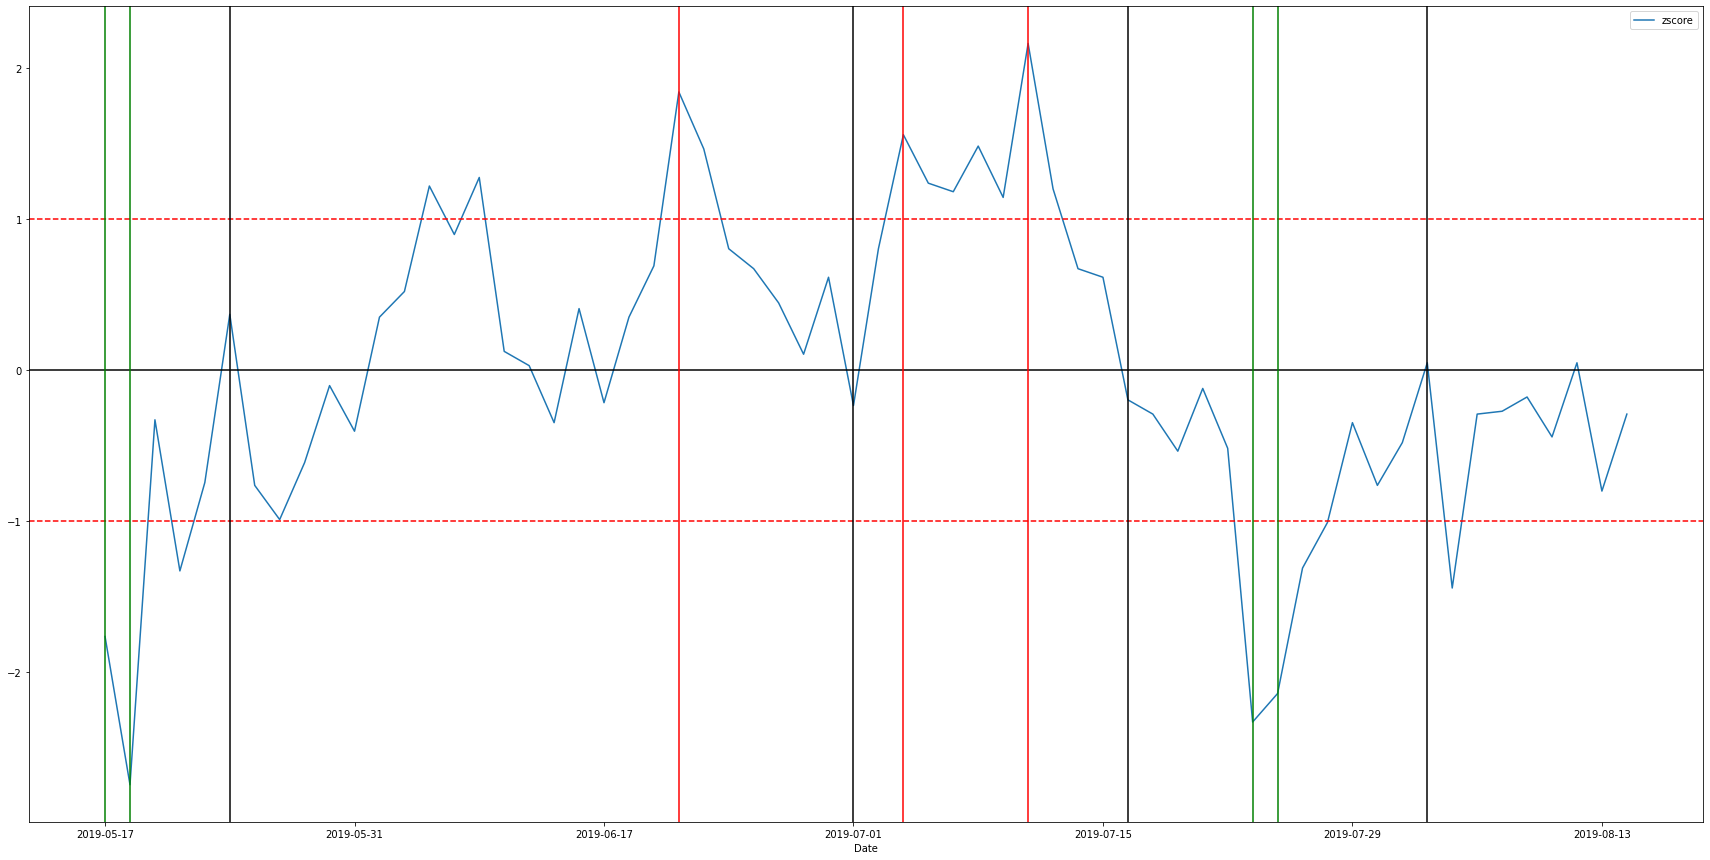

In [14]:
# Plotting the zscore of the Spread of 20 day Simple Moving Average
orders_plt = pair_orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = pair_orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")


__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 5.6 Put the orders into a csv

In [15]:
pair_orders_df = pair_orders_df.set_index('Date')
pair_orders_df.to_csv('Pair4_orders.csv')